# Table of Contents

1. <b>Data Exploration</b> - Loading Data, Structure, types, missing values, distribution of features, correlation, etc.
2. <b>Data Preprocessing</b> - Remove Unnecessary Columns, handling missing values, scaling, encoding categorical variables
3. <b>Model Training and Evaluation</b> - Linear Regression, Regression Tree, Polynomial Regression, KNN, L1 (Lasso), and L2 (Ridge) Regressions
4. <b>Prediction</b>
5. <b>Improvements</b> - Feature Engineering, Model Tuning, Feature Selection, Evaluation with Different Metrics

In [1]:
# dependencies

from pprint import pprint
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import Levenshtein
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

# EDA

### Read the train and label data

In [2]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')
# remove the useless indices from X and y-+-

X = X.drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1)
y = y.drop(['id'], axis=1)

print(y.head())
# add the Salary from y column to X as a different dataframe
train_data = pd.concat([X, y], axis=1)
train_data

     Salary
0  175966.0
1  160000.0
2   35000.0
3  195000.0
4  120000.0


,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race,height,weight,professionalism,Salary
0,52.0,M,bachelor's|degr,back|end|develope,24.0,australi,Asian,1.800316,95.021957,1150.0,175966.0
1,52.0,F,bachelor,operations|manage,23.0,us,White,2.451414,87.456039,1100.0,160000.0
2,27.0,M,bachelor,junior|accountan,2.0,australi,Australian,1.917509,56.997108,26.0,35000.0
3,32.0,M,bachelor,data|analys,11.0,u,Welsh,2.160562,61.403169,279.0,195000.0
4,39.0,F,bachelor,senior|product|manage,11.0,chin,Korean,1.794105,72.049210,380.0,120000.0
...,...,...,...,...,...,...,...,...,...,...,...
5358,32.0,F,bachelor,junior|business|development|associat,4.0,canad,Black,2.329507,64.070050,93.0,50000.0
5359,44.0,M,p,data|scientis,15.0,chin,White,1.945457,93.478548,546.0,140000.0
5360,25.0,M,high|scho,delivery|drive,1.0,canad,Asian,1.575751,38.216264,0.0,28000.0
5361,32.0,F,bachelor's|degr,software|enginee,6.0,chin,White,1.797528,56.571118,150.0,90000.0


### Summary statistics for numerical features

In [3]:
numerical_summary = train_data.select_dtypes(include=['float64', 'int64']).describe()

numerical_summary

,Age,Years of Experience,height,weight,professionalism,Salary
count,5359.000000,5360.000000,5363.000000,5361.000000,5360.000000,5358.000000
mean,35.148722,9.660914,2.002573,66.937032,316.371735,115624.128779
std,7.615117,6.438456,0.292412,18.346610,304.989037,52754.945428
min,22.000000,1.000000,1.500276,13.637206,0.000000,500.000000
25%,29.000000,5.000000,1.750666,53.891837,84.000000,70000.000000
50%,33.000000,8.000000,2.001049,64.747191,217.000000,115000.000000
75%,39.000000,13.000000,2.262341,78.374262,451.000000,160000.000000
max,64.000000,120.000000,2.499932,200.000000,2040.000000,250000.000000


### Displaying data types and unique values for each column to identify potential categorical columns

In [4]:
data_summary = train_data.nunique().reset_index()
data_summary.columns = ['Column', 'Unique Values']
data_summary['Data Type'] = [train_data[col].dtype for col in data_summary['Column']]
data_summary

,Column,Unique Values,Data Type
0,Age,43,float64
1,Gender,3,object
2,Education Level,6,object
3,Job Title,175,object
4,Years of Experience,40,float64
5,Country,6,object
6,Race,11,object
7,height,5363,float64
8,weight,5360,float64
9,professionalism,274,float64


### Missing Values

In [5]:
# Checking for missing values in the dataset
missing_values = train_data.isnull().sum()

# Showing columns with missing values
missing_values[missing_values > 0]


Age                    4
Gender                 4
Education Level        3
Job Title              2
Years of Experience    3
weight                 2
professionalism        3
Salary                 5
dtype: int64

### Distributions 

c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

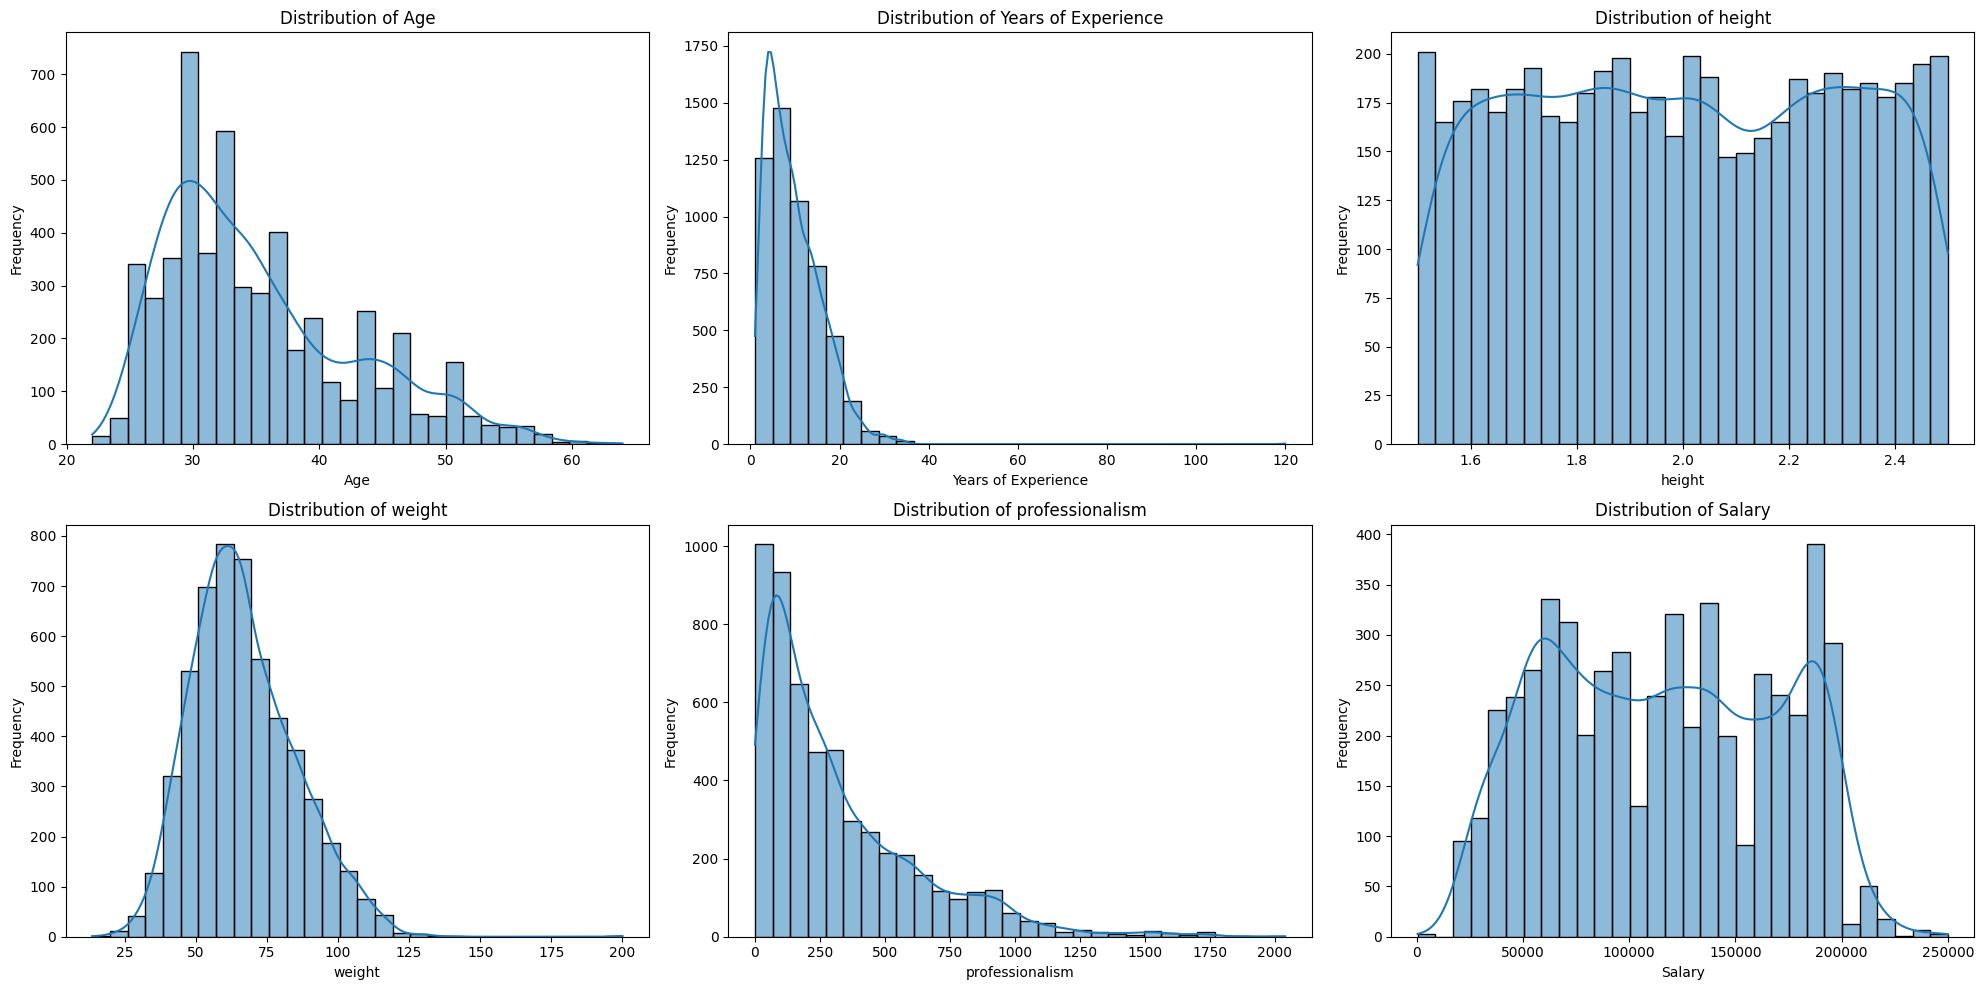

In [6]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots
rows_num = 2
cols_num = len(numeric_columns) // rows_num
fig, axes = plt.subplots(rows_num, cols_num, figsize=(20, 10))

# Iterate over each numeric column and create the distribution subplots
for i, column in enumerate(numeric_columns):
    r_x = i // cols_num
    y_x = i % cols_num
    ax = axes[r_x, y_x]
    # sns.boxplot(data=train_data, y=column, )
    sns.histplot(train_data[column], bins=30, kde=True, ax=ax)
    ax.set_title('Distribution of ' + column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

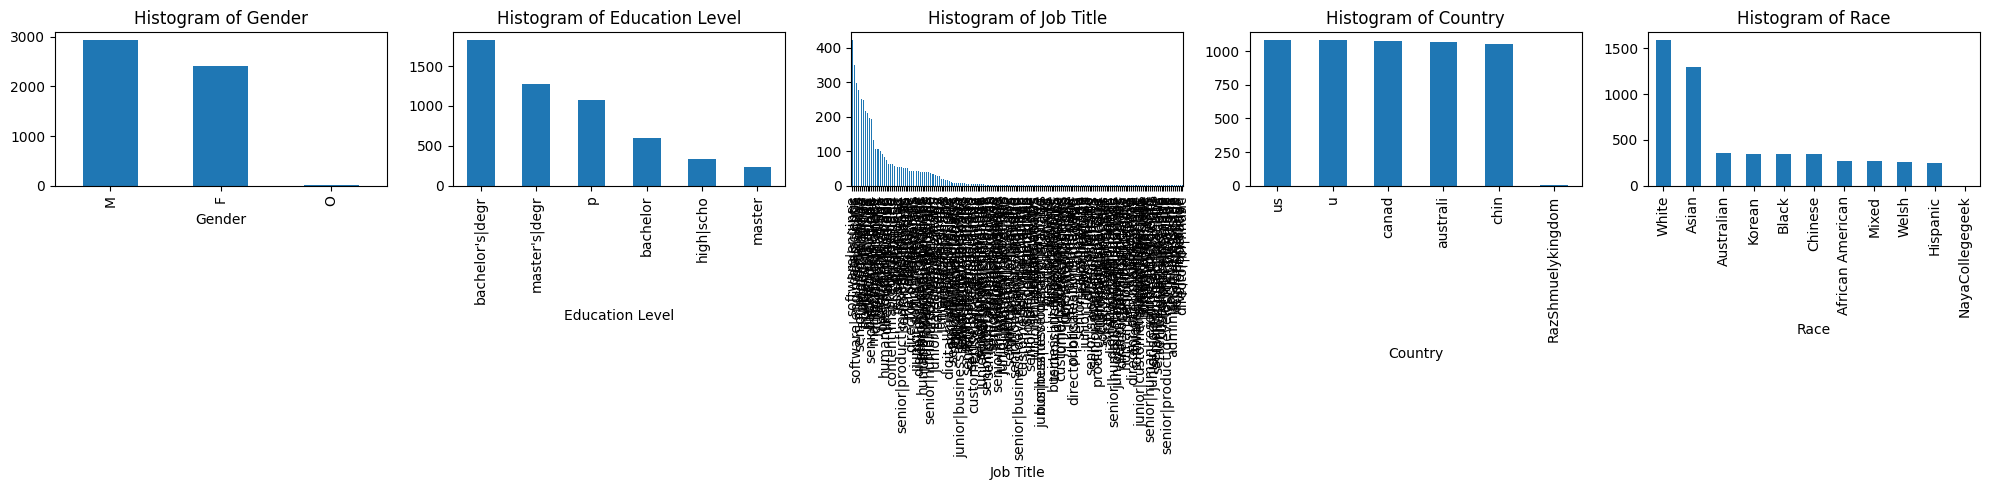

In [7]:
# Select only categorical columns
categorical_columns = train_data.select_dtypes(include='object').columns

# Create a grid of subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 5))

# Iterate over each categorical column and create a bar plot in the corresponding subplot
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = train_data[column].value_counts()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f"Histogram of {column}")

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

### Correlations

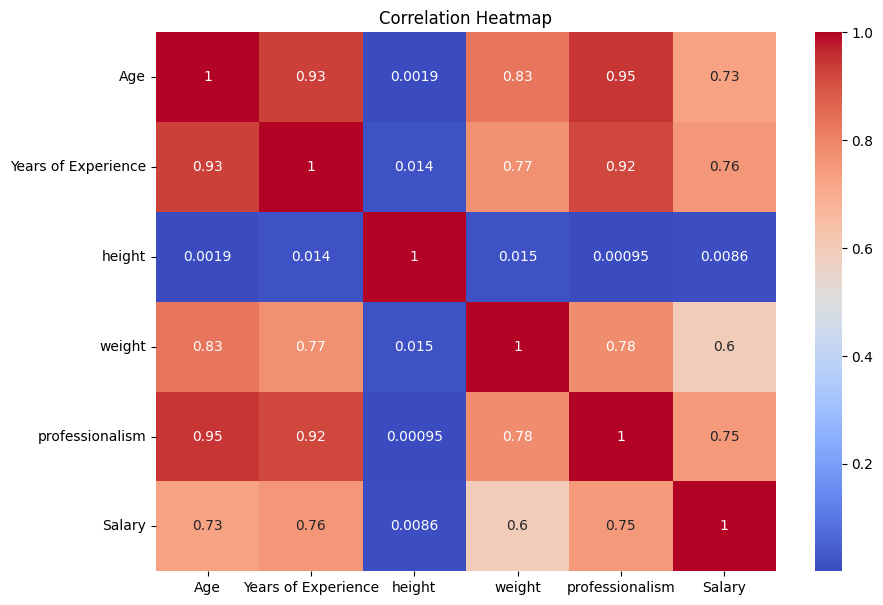

In [8]:
# Computing the correlation matrix for numerical features
correlation_matrix = train_data[numeric_columns].corr()

# Plotting the heatmap for correlations
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
# Calculating the correlation between numerical features and Salary
correlation_with_salary = train_data.corr(numeric_only=True)['Salary'].sort_values(ascending=False)

correlation_with_salary

Salary                 1.000000
Years of Experience    0.757751
professionalism        0.749656
Age                    0.729091
weight                 0.597934
height                 0.008630
Name: Salary, dtype: float64

c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


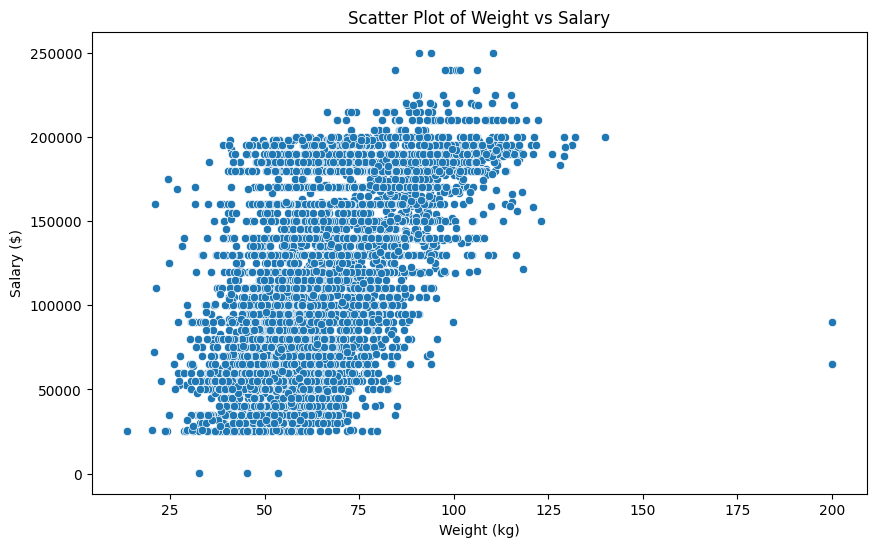

In [10]:
# Plotting a scatter plot to visualize the correlation between "Weight" and "Salary"
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['weight'], y=train_data['Salary'])
plt.title('Scatter Plot of Weight vs Salary')
plt.xlabel('Weight (kg)')
plt.ylabel('Salary ($)')
plt.show()

### Outliers

c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

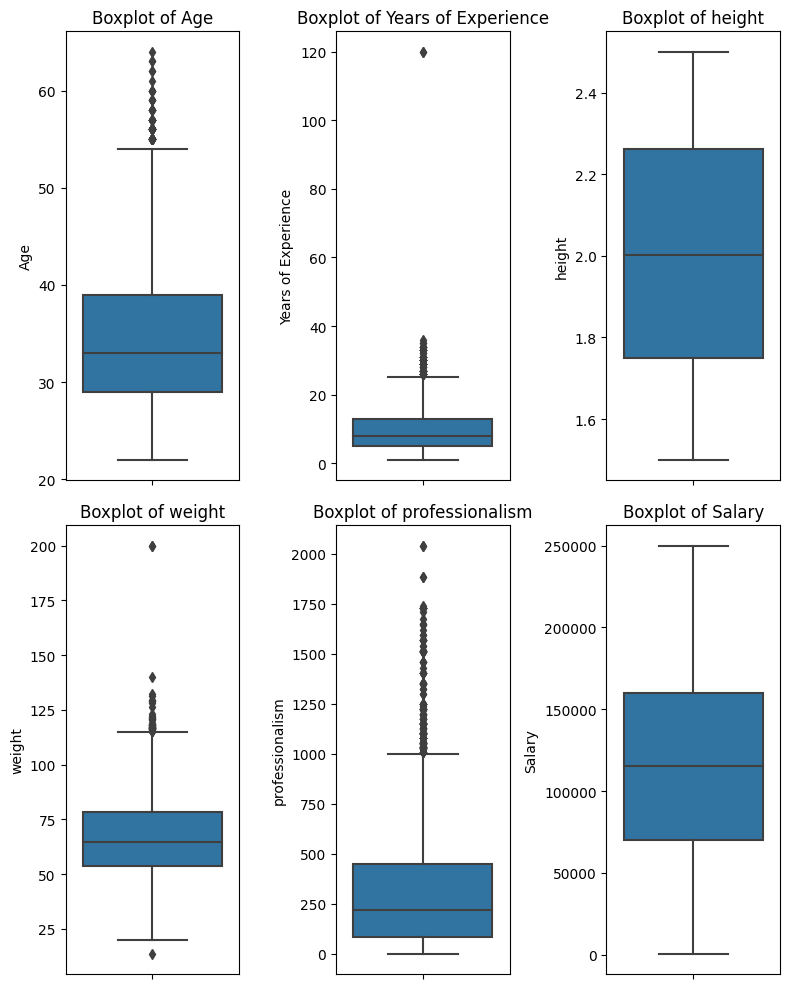

In [11]:
# Select only numeric columns
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots
rows_num = 2
cols_num = len(numeric_columns) // rows_num
fig, axes = plt.subplots(rows_num, cols_num, figsize=(8, 10))

# Iterate over each numeric column and create a boxplot in the corresponding subplot
for i, column in enumerate(numeric_columns):
    r_x = i // cols_num
    y_x = i % cols_num
    ax = axes[r_x, y_x]
    sns.boxplot(data=train_data, y=column, ax=ax)
    ax.set_title(f"Boxplot of {column}")

# Adjust the layout of the subplots
fig.tight_layout()

# Show the plot
plt.show()

In [12]:
import pandas as pd

# Define the thresholds for each column
thresholds = {
    'Age': (18, 70),
    'Years of Experience': (0, 40),
    'height': (1.4, 2.2),
    'weight': (40, 150),
    'Salary': (20000, 250000),
    'professionalism': (0, 1000)
}

# Create an empty dictionary to store the outliers
outliers = {}

# Iterate over each column and find the outliers
for column, (lower_threshold, upper_threshold) in thresholds.items():
    column_outliers = train_data[(train_data[column] < lower_threshold) | (train_data[column] > upper_threshold)][column]
    outliers[column] = column_outliers

# Print the outliers
for column, column_outliers in outliers.items():
    print(f"{column} outliers:")
    print("Count:", column_outliers.count())
    print("Unique values:", column_outliers.unique())
    print()

Age outliers:
Count: 0
Unique values: []

Years of Experience outliers:
Count: 2
Unique values: [120.]

height outliers:
Count: 1681
Unique values: [2.4514137  2.20977114 2.34989206 ... 2.33841282 2.21973778 2.32950731]

weight outliers:
Count: 242
Unique values: [ 33.49648793  36.052284    34.82411107  30.56092749  36.59050537
  38.52149224  36.6705717   36.39949168  33.57493516  38.27267918
  39.20147434  39.10473482  35.30740248  36.71576166  20.99013573
  39.81398679  27.5479202   30.3247903  200.          38.66523987
  37.33212074  29.52687785  39.34235588  36.41468628  37.9318699
  39.49820869  38.95502466  38.71647095  39.22969289  39.10765285
  30.06400785  38.11335569  36.29701702  24.06004995  36.09342956
  37.20380287  28.71752928  33.89832212  39.35048439  34.20487189
  35.56091601  32.30531308  32.87190723  39.62102881  31.02171591
  36.14740617  34.50510973  36.25863601  38.25280086  35.59416597
  29.72117803  37.54112413  35.19579386  37.78417557  39.71321991
  39.198550

### Conclusions:
1. years_of_experience - Delete the two 120
2. Height - A normal distribution
3. weight - There are 200+ childish weights, but still, there is an outlier (200 kg) 
4. salary - Delete the three outliers
5. professionalism - There are 175 big values, maybe use percentile of 0.95 to remove the extreme upper limit.

### Categorical Feature Insights

In [13]:
# Gender,Education Level, Job Title, country, race

# Gender distribution
gender_distribution = train_data['Gender'].value_counts()
gender_distribution

Gender
M    2944
F    2403
O      12
Name: count, dtype: int64

In [14]:
# Education Level distribution
education_level_distribution = train_data['Education Level'].value_counts()

education_level_distribution.head(10) # Displaying the top 10 most frequent education levels

Education Level
bachelor's|degr    1832
master's|degr      1281
p                  1078
bachelor            602
high|scho           337
master              230
Name: count, dtype: int64

In [15]:
# Job Title distribution
job_title_distribution = train_data['Job Title'].value_counts()

job_title_distribution.head(10) # Displaying the top 10 most frequent job titles

Job Title
software|enginee            424
data|scientis               350
software|engineer|manage    298
data|analys                 279
senior|project|enginee      264
product|manage              253
full|stack|enginee          250
front|end|develope          217
marketing|manage            211
back|end|develope           197
Name: count, dtype: int64

In [16]:
# country Level distribution
country_distribution = train_data['Country'].value_counts()

country_distribution.head(20) # Displaying the top 10 most frequent country

Country
us                   1085
u                    1083
canad                1076
australi             1068
chin                 1049
RazShmuelykingdom       2
Name: count, dtype: int64

In [17]:
# race Level distribution
race_distribution = train_data['Race'].value_counts()

race_distribution.head(10) # Displaying the top 10 most frequent race

Race
White               1594
Asian               1292
Australian           360
Korean               351
Black                350
Chinese              349
African American     275
Mixed                275
Welsh                264
Hispanic             251
Name: count, dtype: int64

c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


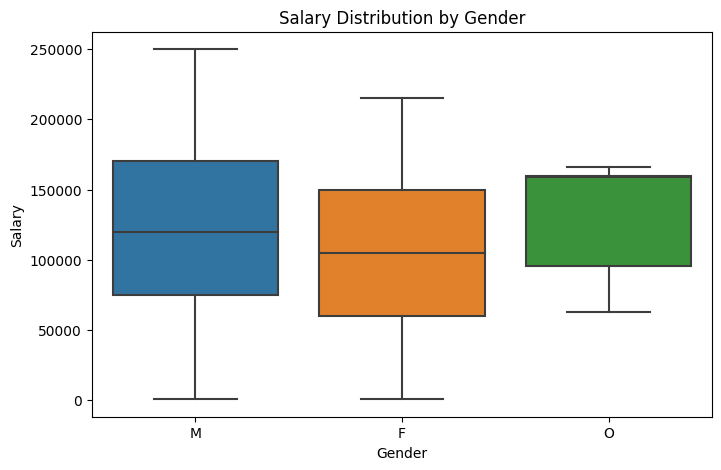

In [18]:
# Plotting the median salary by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Salary', data=train_data)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()


# Data Preparation

In [19]:
# Lets look at the tail of the job titles
print(train_data['Job Title'].value_counts().tail(10), '\n')
print(train_data['Job Title'].value_counts().head(10), '\n')

Job Title
technical|recruite                   1
senior|product|development|manage    1
develope                             1
social|media|ma                      1
administrative|assistan              1
account|manage                       1
help|desk|analys                     1
hr|manage                            1
vp|of|operation                      1
director|of|financ                   1
Name: count, dtype: int64 

Job Title
software|enginee            424
data|scientis               350
software|engineer|manage    298
data|analys                 279
senior|project|enginee      264
product|manage              253
full|stack|enginee          250
front|end|develope          217
marketing|manage            211
back|end|develope           197
Name: count, dtype: int64 



* Conclusion - the endings are malformed, most of the time is a single letter.
* Solution - Use Levenshtein similarity and lookup for the most similar option.

### Transformers

In [20]:
class JobTitleTransformer(BaseEstimator, TransformerMixin):
    json_file = 'job-titles.json'
    
    def __init__(self):
        # Read the json of correct job titles
        with open(self.json_file, 'r') as f:
            job_titles = json.load(f)
        self.job_titles = job_titles['job-titles']

    def transform(self, X, y=None):
        X['Job Title'] = X['Job Title'].str.replace('|', ' ', regex=False)
        new_mapping = {title: JobTitleTransformer._get_closest_text(title, texts=self.job_titles) for title in 
                       X['Job Title'].unique()}
        X['Job Title'] = X['Job Title'].replace(new_mapping)
        return X

    def fit(self, X, y=None):
        return self
    
    @staticmethod
    def _get_closest_text(query_text, texts):
        closest_text = min(texts, key=lambda x: Levenshtein.distance(query_text, x))
        return closest_text

class JobCategoryTransformer(BaseEstimator, TransformerMixin):
    job_categories_keywords = {
        "Engineering": ['engineer', 'developer', 'software'],
        "Data": ['data', 'analyst', 'scientist'],
        "Marketing": ['marketing', 'sales', 'marketing'],
        "Human Resources": ['hr', 'human resources'],
        "Finance": ['finance', 'financial', 'accountant'],
        "Management": ['manager', 'director', 'lead', 'supervisor', 'head', 'operations', 'ceo'],
    }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create an empty array to store the one-hot encoding for each category
        one_hot_encodings = []

        # Iterate over each row in the input DataFrame
        for _, row in X.iterrows():
            job_title = row['Job Title']
            category_encoding = [0] * (len(self.job_categories_keywords) + 1)

            # Check if any of the keywords for each category is present in the job title
            for i, category_keywords in enumerate(self.job_categories_keywords.values()):
                if any(keyword in job_title.lower() for keyword in category_keywords):
                    category_encoding[i] = 1
            
            if sum(category_encoding) == 0:
                category_encoding[-1] = 1
            
            one_hot_encodings.append(category_encoding)

        # Convert the list of encodings to a NumPy array
        one_hot_encodings = np.array(one_hot_encodings)

        X[[*list(self.job_categories_keywords.keys()), 'Other']] = one_hot_encodings
        
        return X

class SeniorityTransformer(BaseEstimator, TransformerMixin):
    seniority_keywords = {
        "Junior": ['junior', 'jr', 'entry'],
        "Mid-Level": [],
        "Senior": ['senior', 'sr', 'lead'],
        "Executive": ['executive', 'chief', 'director', 'ceo'],
    }

    default_seniority = list(seniority_keywords.keys()).index('Mid-Level')
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Create an empty list to store the transformed seniority values
        transformed_seniority = []

        # Iterate over each row in the input DataFrame
        for _, row in X.iterrows():
            job_title = row['Job Title']
            transformed_value = None

            # Check if any of the keywords for each seniority level is present in the job title
            for i, (seniority, seniority_keywords) in enumerate(self.seniority_keywords.items()):
                if any(keyword in job_title.lower() for keyword in seniority_keywords):
                    transformed_value = i
                    break
                else:
                    transformed_value = self.default_seniority
            transformed_seniority.append(transformed_value)

        X['Seniority'] = transformed_seniority
        
        return X

class CountryTransformer(BaseEstimator, TransformerMixin):
    # Define the custom function to fix the values in the 'country' column
    def transform(self, X, y=None):
        X['Country'] = X['Country'].replace({
            'australi': 'australia',
            'us': 'united states',
            'u': 'unknown',
            'chin': 'china',
            'canad': 'canada'
        })
        return X
    
    def fit(self, X, y=None):
        return self

class EducationTitleTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Education Level'] = X['Education Level'].replace({
            "high|scho": "High School",
            "bachelor's|degr": "Bachelor's Degree",
            "bachelor": "Bachelor's Degree",
            "master's|degr": "Master's Degree",
            "master": "Master's Degree",
            "p": "Ph.D."
        })
        return X

class OutlierTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X , y=None, years=40, salary=20000, bad_countries=['RazShmuelykingdom'], 
                  bad_races=['NayaCollegegeek'], bad_genders=['O']):
        return X[(X['Years of Experience'] <= years) & 
                 (X['Salary'] >= salary) & 
                 (~X['Country'].isin(bad_countries)) & 
                 (~X['Race'].isin(bad_races)) &
                 (~X['Gender'].isin(bad_genders))].copy()


def drop_bad_columns(X: pd.DataFrame):
    return X.dropna().copy()

In [21]:
education_order = ['High School', "Bachelor's Degree", "Master's Degree", 'Ph.D.'] # Order for ordinal encoding

# Define the pipeline for the preprocessing
ct = ColumnTransformer([
        ('GenderEncoder', OneHotEncoder(drop=None, sparse_output=False), ['Gender', 'Country', 'Race']),
        ('EducationLevelEncoder', OrdinalEncoder(categories=[education_order]), ['Education Level'])
    ], remainder='passthrough', verbose_feature_names_out=False)

ct.set_output(transform='pandas')

pipeline = Pipeline([
    ('DropNaTransformer', FunctionTransformer(drop_bad_columns)),
    ('CountryTransformer', CountryTransformer()),
    ('JobTitleTransformer', JobTitleTransformer()),
    ('JobCategoryTransformer', JobCategoryTransformer()),
    ('SeniorityTransformer', SeniorityTransformer()),
    ('EducationTitleTransformer', EducationTitleTransformer()),
    ('OutlierTransformer', OutlierTransformer()),
    ('ColumnTransformers', ct),
])

transformed_train_data = pipeline.fit_transform(train_data)

In [22]:
transformed_train_data.head().T

,0,1,2,3,4
Gender_F,0.0,1.0,0.0,0.0,1.0
Gender_M,1.0,0.0,1.0,1.0,0.0
Country_australia,1.0,0.0,1.0,0.0,0.0
Country_canada,0.0,0.0,0.0,0.0,0.0
Country_china,0.0,0.0,0.0,0.0,1.0
Country_united states,0.0,1.0,0.0,0.0,0.0
Country_unknown,0.0,0.0,0.0,1.0,0.0
Race_African American,0.0,0.0,0.0,0.0,0.0
Race_Asian,1.0,0.0,0.0,0.0,0.0
Race_Australian,0.0,0.0,1.0,0.0,0.0


# Post Transformation EDA

### Job Titles

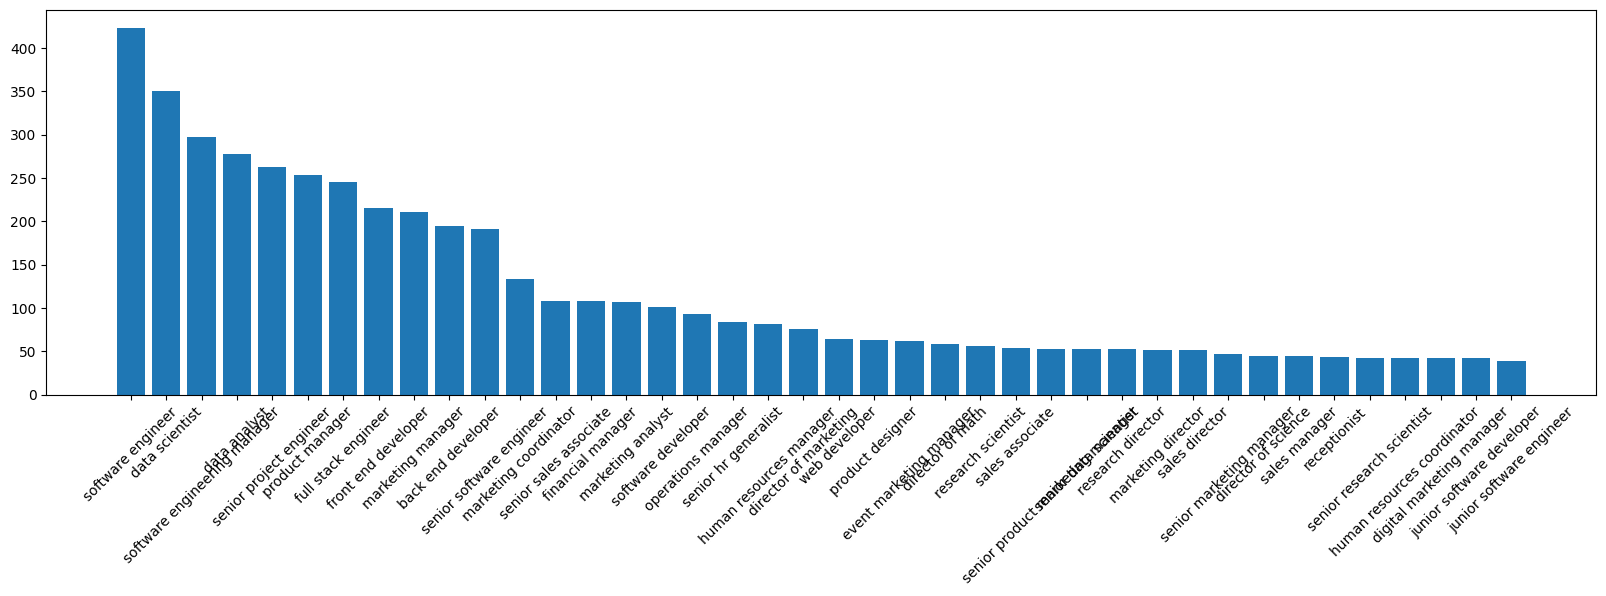

In [23]:
plt.figure(figsize=(20, 5))
plt.bar(x=transformed_train_data['Job Title'].value_counts().head(40).index, height=transformed_train_data['Job Title'].value_counts().head(40))
plt.xticks(rotation=45)
plt.show()

### Salaries correlation

c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


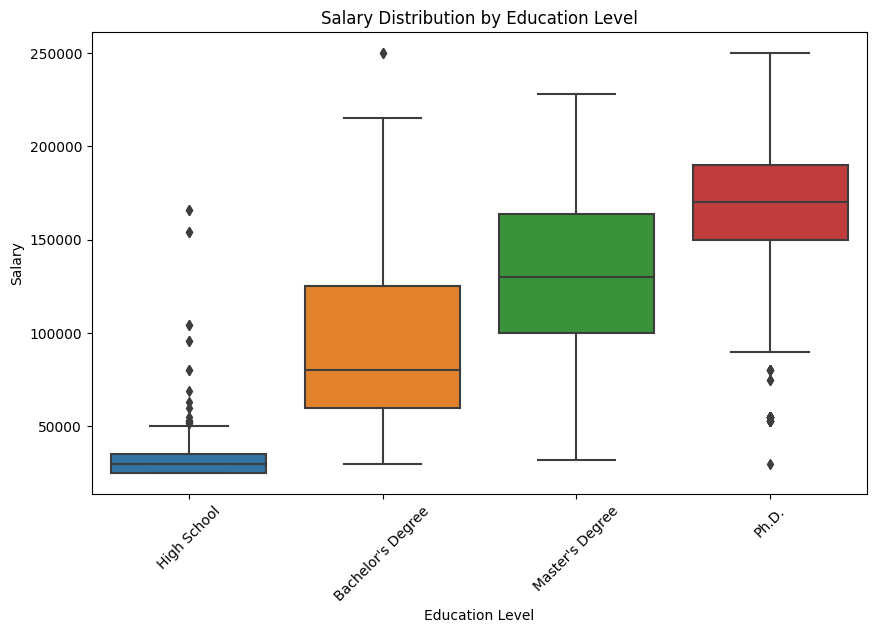

In [24]:
# Plotting the median salary by Education Level
education_level_mapping = {0: 'High School', 1: "Bachelor's Degree", 2: "Master's Degree", 3: 'Ph.D.'}
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education Level', y='Salary', data=transformed_train_data.replace(education_level_mapping), order=education_order)
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


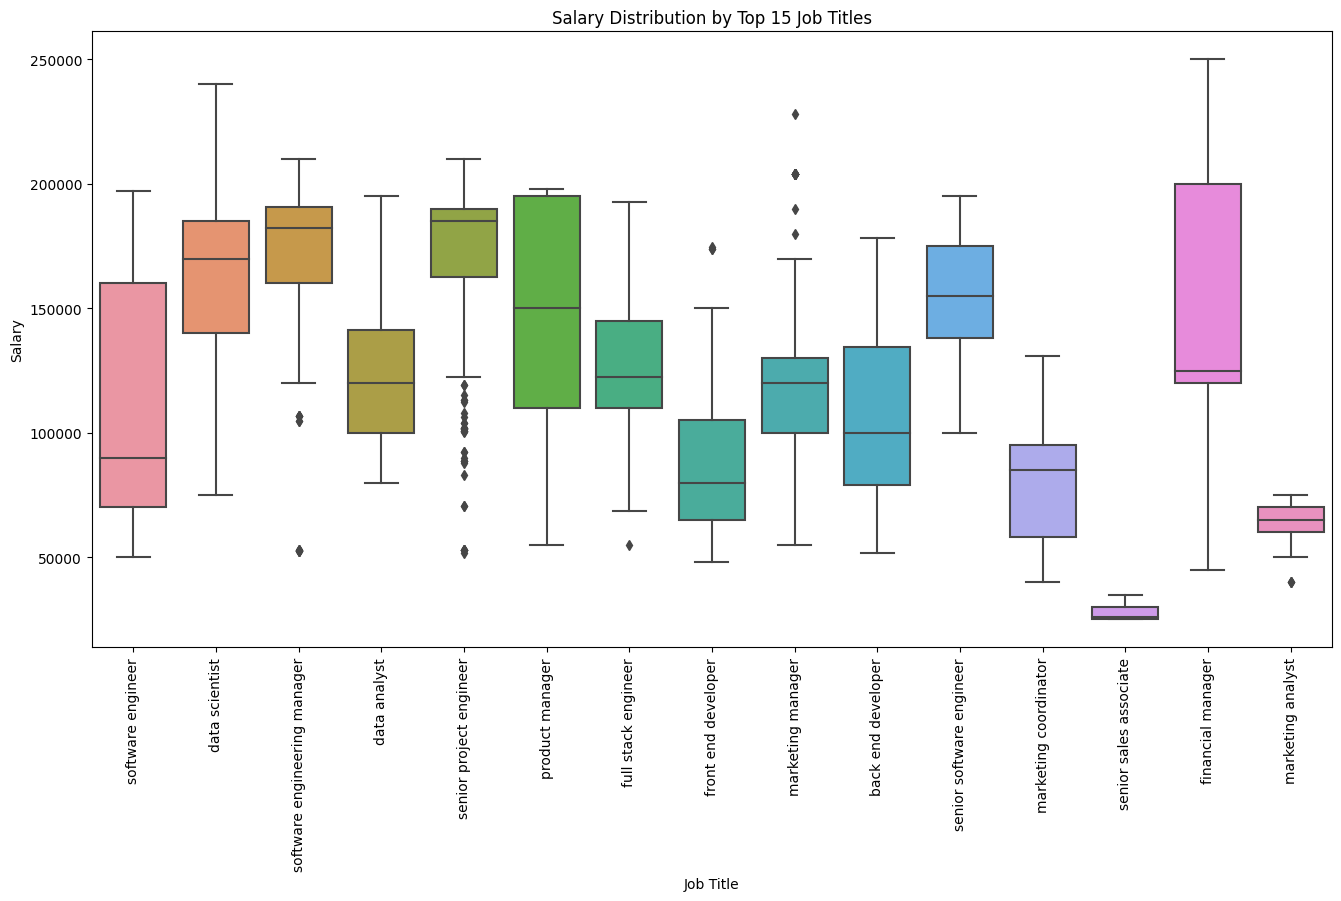

In [25]:
# Handeling Jon Title

# Exploring the relationship between job titles and other features
# Plotting the median salary for the top 15 most frequent Job Titles
top_15_job_titles = transformed_train_data['Job Title'].value_counts().index[:15]
top_15_job_titles_data = transformed_train_data[transformed_train_data['Job Title'].isin(top_15_job_titles)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='Job Title', y='Salary', data=top_15_job_titles_data, order=top_15_job_titles)
plt.title('Salary Distribution by Top 15 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


### Other correlation

c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


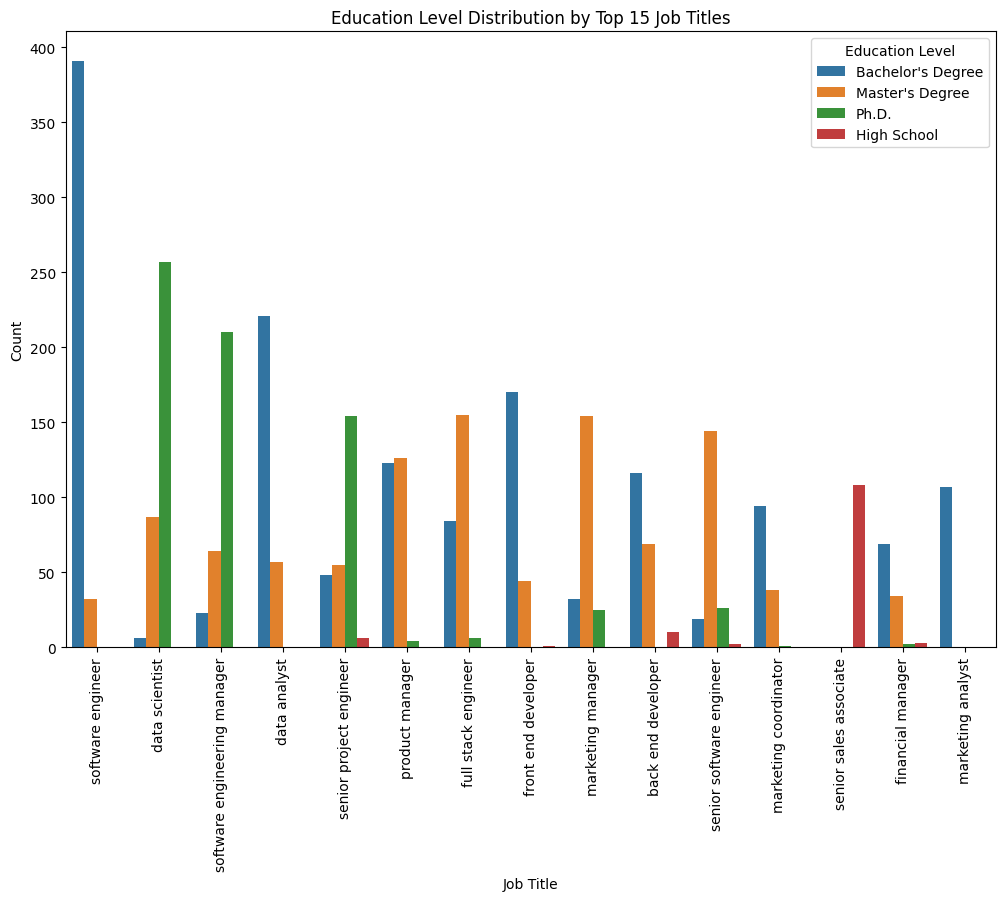

In [26]:
# Relationship with Education Level
# Mapping the ordinal encoded Education Level back to the categorical representation for visualization
education_level_mapping = {0: 'High School', 1: "Bachelor's Degree", 2: "Master's Degree", 3: 'Ph.D.'}
#top_15_job_titles_data['Education Level'] = top_15_job_titles_data['Education Level'].map(education_level_mapping)

# Plotting the Education Level distribution for the top 15 most frequent Job Titles
plt.figure(figsize=(12, 8))
sns.countplot(data=top_15_job_titles_data.replace(education_level_mapping), x='Job Title', hue='Education Level', order=top_15_job_titles)
plt.title('Education Level Distribution by Top 15 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Education Level')
plt.show()


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


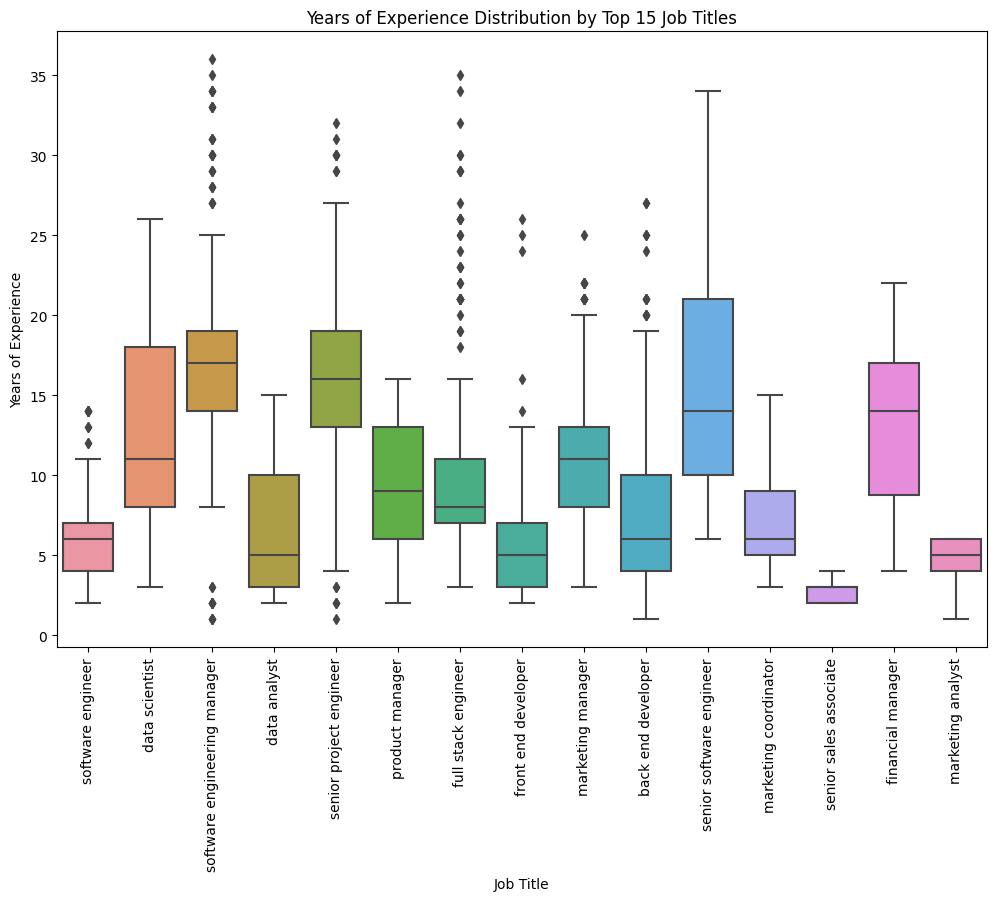

In [27]:
# Plotting the distribution of Years of Experience for the top 15 most frequent Job Titles
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job Title', y='Years of Experience', data=top_15_job_titles_data, order=top_15_job_titles)
plt.title('Years of Experience Distribution by Top 15 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Years of Experience')
plt.xticks(rotation=90)
plt.show()


### Job Titles exploration

In [28]:
# analyzing the common words and phrases within the job titles to identify potential groupings

from collections import Counter

# Tokenizing the job titles and counting the frequency of words
job_title_words = ' '.join(transformed_train_data['Job Title']).split()
word_counts = Counter(job_title_words)

# Getting the top 20 most common words
top_20_words = word_counts.most_common(20)
top_20_words


[('manager', 1411),
 ('engineer', 1167),
 ('software', 1097),
 ('senior', 947),
 ('marketing', 823),
 ('data', 702),
 ('developer', 655),
 ('scientist', 504),
 ('analyst', 495),
 ('end', 410),
 ('product', 378),
 ('director', 352),
 ('sales', 348),
 ('project', 321),
 ('engineering', 299),
 ('full', 245),
 ('stack', 245),
 ('junior', 215),
 ('front', 215),
 ('coordinator', 214)]

In [29]:
# Identifying job titles containing terms related to management (e.g., "manager", "director")
management_keywords = ['manager', 'director', 'lead', 'supervisor', 'head']
management_titles = [title for title in transformed_train_data['Job Title'] if any(keyword in title for keyword in management_keywords)]

# Counting the frequency of management job titles
management_title_counts = Counter(management_titles)

# Getting the top 10 most common management job titles
top_10_management_titles = management_title_counts.most_common(10)
top_10_management_titles, len(management_titles)

([('software engineering manager', 297),
  ('product manager', 253),
  ('marketing manager', 211),
  ('financial manager', 108),
  ('operations manager', 93),
  ('human resources manager', 82),
  ('director of marketing', 76),
  ('event marketing manager', 62),
  ('director of math', 58),
  ('senior product marketing manager', 53)],
 1763)

In [30]:
# Identifying Job Categories

# Defining potential categories and associated keywords
job_categories_keywords = {
    "Engineering": ['engineer', 'developer', 'software'],
    "Data": ['data', 'analyst', 'scientist'],
    "Marketing": ['marketing', 'sales', 'marketing'],
    "Human Resources": ['hr', 'human resources'],
    "Finance": ['finance', 'financial'],
    "Management": ['manager', 'director', 'lead', 'supervisor', 'head','operations'],
}

# Counting the frequency of job titles within each category
job_categories_counts = {category: sum(any(keyword in title for keyword in keywords) for title in transformed_train_data['Job Title']) for category, keywords in job_categories_keywords.items()}
job_categories_counts


{'Engineering': 2123,
 'Data': 1000,
 'Marketing': 1170,
 'Human Resources': 255,
 'Finance': 165,
 'Management': 1775}

In [31]:
# Identifying Seniority Levels:

# Defining potential seniority levels and associated keywords
seniority_keywords = {
    "Senior": ['senior', 'sr', 'lead'],
    "Junior": ['junior', 'jr', 'entry'],
    "Executive": ['executive', 'chief', 'director']
}

# Counting the frequency of job titles within each seniority level
seniority_counts = {level: sum(any(keyword in title for keyword in keywords) for title in transformed_train_data['Job Title']) for level, keywords in seniority_keywords.items()}

# Identifying titles that do not fall into the defined seniority levels (potential Mid-Level)
mid_level_count = len(train_data['Job Title']) - sum(seniority_counts.values())
seniority_counts['Mid-Level'] = mid_level_count
seniority_counts


{'Senior': 947, 'Junior': 216, 'Executive': 380, 'Mid-Level': 3820}

In [32]:
# adding the "Management Role" column

# management keywords to match the format of job titles
management_keywords_formatted = ['manager', 'director', 'lead', 'supervisor', 'head', 'ceo']

# Function to identify management role
def identify_management_role(title):
    return int(any(keyword in title for keyword in management_keywords_formatted))

# Re-adding the "Management Role" column (1 for management role, 0 otherwise)
jobs_with_management_role = pd.DataFrame(
    {'Job Title': transformed_train_data['Job Title'], 
     'Management Role': transformed_train_data['Job Title'].apply(identify_management_role)}
)

# count of management roles compared to non-management roles
management_role_count = len(jobs_with_management_role[jobs_with_management_role['Management Role'] == 1])
non_management_role_count = len(jobs_with_management_role) - management_role_count

print(f'Management role count: {management_role_count},'
      f' Non-management role count: {non_management_role_count}')

Management role count: 1764, Non-management role count: 3576


In [33]:
# Function to identify job category
def identify_job_category(title):
    for category, keywords in job_categories_keywords.items():
        if any(keyword in title for keyword in keywords):
            return category
    return 'Other'  # If the title does not fall into any defined category

# Adding the "Job Category" column
transformed_train_data['Job Category'] = transformed_train_data['Job Title'].apply(identify_job_category)

# Checking the first few rows to verify the new column
transformed_train_data[['Job Title', 'Job Category']].head()


,Job Title,Job Category
0,back end developer,Engineering
1,operations manager,Management
2,junior accountant,Other
3,data analyst,Data
4,senior product manager,Management


In [34]:
# Extracting job titles that were categorized as "Other"
all_categories = JobCategoryTransformer.job_categories_keywords
other_category_titles = transformed_train_data[transformed_train_data['Other'] == 1]['Job Title']

# Displaying a sample of job titles categorized as "Other"
other_category_sample = other_category_titles.sample(100, random_state=42)
print('example of job titles categorized as "Other":')
pprint(other_category_sample.unique().tolist())

print(f'\n\nNumber of job titles categorized as "Other": {len(other_category_titles)}',
      f', and number of tagged job titles : {len(transformed_train_data[transformed_train_data["Other"] == 0])}')

example of job titles categorized as "Other":
['receptionist',
 'product designer',
 'senior product designer',
 'business development associate',
 'technical support specialist',
 'junior project coordinator',
 'borough coordinator',
 'graphic designer',
 'direct support specialist',
 'senior training specialist',
 'senior consultant',
 'ux designer',
 'strategy consultant',
 'customer success intern',
 'technical recruiter',
 'delivery driver',
 'technical writer',
 'junior web designer',
 'junior copywriter',
 'it support specialist',
 'apron operator',
 'junior designer',
 'senior project coordinator',
 'digital content producer']


Number of job titles categorized as "Other": 205 , and number of tagged job titles : 5135


# Scaling and training

In [35]:
def drop_categorical_features(X):
    return X.drop(['Job Title'], axis=1)

# Adding a scaler to the pipeline
ct = ColumnTransformer([
        ('GenderEncoder', OneHotEncoder(drop=None, sparse_output=False), ['Gender', 'Country', 'Race']),
        ('EducationLevelEncoder', OrdinalEncoder(categories=[education_order]), ['Education Level']),
        ('scaler', StandardScaler(), ['Age', 'Years of Experience', 'height', 'weight', 'professionalism']),
    ], remainder='passthrough', verbose_feature_names_out=False)

ct.set_output(transform='pandas')

pipeline = Pipeline([
    ('DropNaTransformer', FunctionTransformer(drop_bad_columns)),
    ('CountryTransformer', CountryTransformer()),
    ('JobTitleTransformer', JobTitleTransformer()),
    ('JobCategoryTransformer', JobCategoryTransformer()),
    ('SeniorityTransformer', SeniorityTransformer()),
    ('EducationTitleTransformer', EducationTitleTransformer()),
    ('OutlierTransformer', OutlierTransformer()),
    ('ColumnTransformers', ct),
    ('DropCategoricalTransformer', FunctionTransformer(drop_categorical_features)),
])

transformed_train_data = pipeline.fit_transform(train_data)

In [36]:
transformed_train_data.head().T

,0,1,2,3,4
Gender_F,0.000000,1.000000,0.000000,0.000000,1.000000
Gender_M,1.000000,0.000000,1.000000,1.000000,0.000000
Country_australia,1.000000,0.000000,1.000000,0.000000,0.000000
Country_canada,0.000000,0.000000,0.000000,0.000000,0.000000
Country_china,0.000000,0.000000,0.000000,0.000000,1.000000
Country_united states,0.000000,1.000000,0.000000,0.000000,0.000000
Country_unknown,0.000000,0.000000,0.000000,1.000000,0.000000
Race_African American,0.000000,0.000000,0.000000,0.000000,0.000000
Race_Asian,1.000000,0.000000,0.000000,0.000000,0.000000
Race_Australian,0.000000,0.000000,1.000000,0.000000,0.000000


In [37]:
X = transformed_train_data.drop(columns=['Salary'])
y = transformed_train_data['Salary']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# feature selection
# There are questionable features that maybe can be dropped, those are the following:
# 'Gender', 'Country', 'Race', 'height', 'weight'
# One set of models will use all features, the other will use none of them, and the third will use a subset (without the height).
def create_datasets_perms(X):
    datasets_perms = [
        ('full', X),
        ('none', X.loc[:, ~X.columns.isin(X.filter(regex='Gender|Country|Race|height|weight', axis=1).columns)]),
        ('subset', X.drop(['height'], axis=1))
    ]
    return datasets_perms

In [39]:
X = transformed_train_data.drop(columns=['Salary'])
y = transformed_train_data['Salary']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
training_perms = create_datasets_perms(X_train)
testing_perms = create_datasets_perms(X_test)

In [41]:
model_map = {
    "Lasso": Lasso,
    "Ridge": Ridge,
    "ElasticNet": ElasticNet,
    "KNN": KNeighborsRegressor,
    "DecisionTree": DecisionTreeRegressor
}

def run_model(model: str, params: dict, X_train, y_train, X_test, y_test):
    # Iterate over the configurations and train the models
    assert model in model_map.keys()
    
    model_instance = model_map[model](**params)
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return model_instance, mse, y_pred
    

FULL


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.742e+11, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.742e+11, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: Lasso, params: {'alpha': 0.0001}, MSE: 617099053.2562903
Model: Lasso, params: {'alpha': 0.001}, MSE: 617099033.8236074
Model: Lasso, params: {'alpha': 0.1}, MSE: 617097927.6459513
Model: Ridge, params: {'alpha': 0.0001}, MSE: 617099070.7536452
Model: Ridge, params: {'alpha': 0.001}, MSE: 617099208.8186394
Model: Ridge, params: {'alpha': 0.1}, MSE: 617114636.4198407


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.630e+11, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.5, 'max_iter': 10000}, MSE: 617132924.2439392


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+10, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 10000}, MSE: 617154295.358336


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+12, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.7, 'max_iter': 10000}, MSE: 617119119.0354459
Model: ElasticNet, params: {'alpha': 0.1, 'l1_ratio': 0.7, 'max_iter': 10000}, MSE: 692121004.0793425
Model: KNN, params: {'n_neighbors': 3}, MSE: 722043871.9310236
Model: KNN, params: {'n_neighbors': 5}, MSE: 669456151.1820599
Model: DecisionTree, params: {'max_depth': 3}, MSE: 684724033.0934591
Model: DecisionTree, params: {'max_depth': 5}, MSE: 455098168.5437319


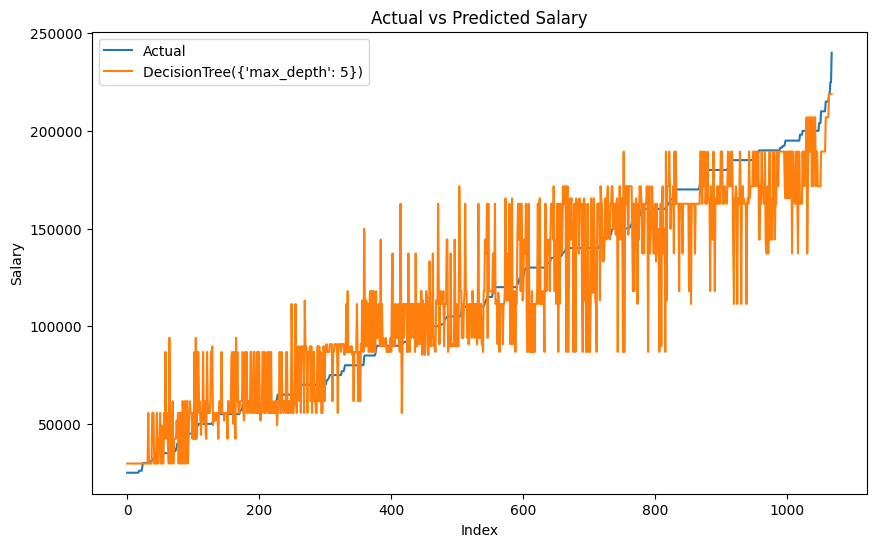



NONE
Model: Lasso, params: {'alpha': 0.0001}, MSE: 619012205.7018634
Model: Lasso, params: {'alpha': 0.001}, MSE: 619012206.1467295
Model: Lasso, params: {'alpha': 0.1}, MSE: 619012257.5288113
Model: Ridge, params: {'alpha': 0.0001}, MSE: 619012221.5782754
Model: Ridge, params: {'alpha': 0.001}, MSE: 619012364.9297737
Model: Ridge, params: {'alpha': 0.1}, MSE: 619028368.0869323
Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.5, 'max_iter': 10000}, MSE: 619047300.6821638
Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 10000}, MSE: 619069383.3571436
Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.7, 'max_iter': 10000}, MSE: 619033004.7746143
Model: ElasticNet, params: {'alpha': 0.1, 'l1_ratio': 0.7, 'max_iter': 10000}, MSE: 693481039.1067896
Model: KNN, params: {'n_neighbors': 3}, MSE: 170572696.92977524
Model: KNN, params: {'n_neighbors': 5}, MSE: 181644818.0455805
Model: DecisionTree, params: {'max_depth': 3}, MSE: 684724033.0934591
Mod

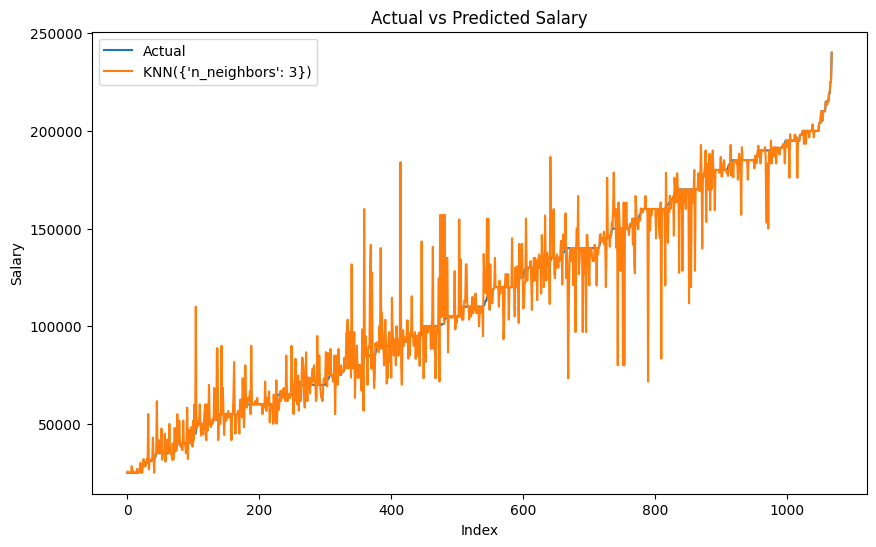



SUBSET
Model: Lasso, params: {'alpha': 0.0001}, MSE: 616667956.9288504


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.742e+11, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(
c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.742e+11, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: Lasso, params: {'alpha': 0.001}, MSE: 616667933.8656117
Model: Lasso, params: {'alpha': 0.1}, MSE: 616666441.066668
Model: Ridge, params: {'alpha': 0.0001}, MSE: 616667974.1268107
Model: Ridge, params: {'alpha': 0.001}, MSE: 616668105.8667767
Model: Ridge, params: {'alpha': 0.1}, MSE: 616682838.397842


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e+11, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.5, 'max_iter': 10000}, MSE: 616700330.1454136


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+10, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.2, 'max_iter': 10000}, MSE: 616720805.6582427


c:\Dev\Naya\Regression-exercises\final_project\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+12, tolerance: 1.188e+09
  model = cd_fast.enet_coordinate_descent(


Model: ElasticNet, params: {'alpha': 0.0001, 'l1_ratio': 0.7, 'max_iter': 10000}, MSE: 616687123.426607
Model: ElasticNet, params: {'alpha': 0.1, 'l1_ratio': 0.7, 'max_iter': 10000}, MSE: 691267816.7328663
Model: KNN, params: {'n_neighbors': 3}, MSE: 670481899.8690178
Model: KNN, params: {'n_neighbors': 5}, MSE: 641766640.1841198
Model: DecisionTree, params: {'max_depth': 3}, MSE: 684724033.0934591
Model: DecisionTree, params: {'max_depth': 5}, MSE: 455098168.5437319


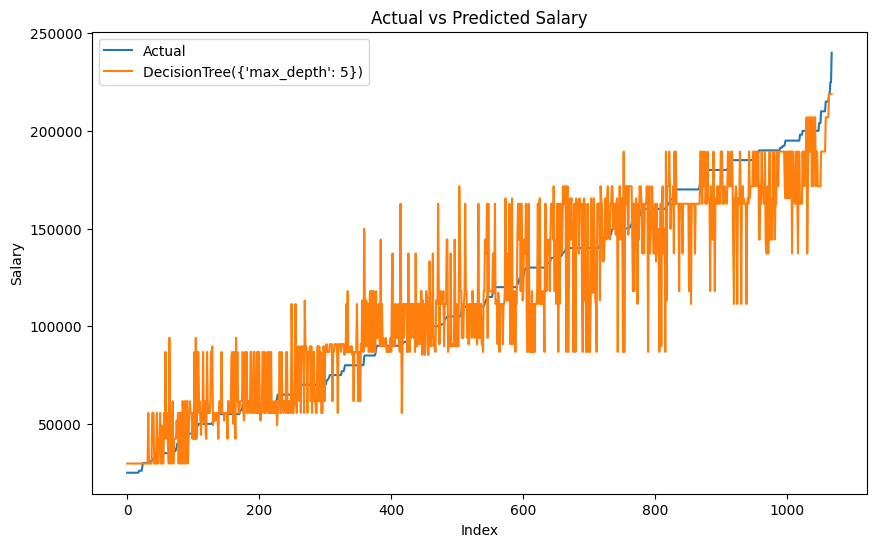

In [42]:
# Define a list of configurations to try
configurations = [
    {'model': "Lasso", 'params': {'alpha': 0.0001}},
    {'model': "Lasso", 'params': {'alpha': 0.001}},
    {'model': "Lasso", 'params': {'alpha': 0.1}},
    {'model': "Ridge", 'params': {'alpha': 0.0001}},
    {'model': "Ridge", 'params': {'alpha': 0.001}},
    {'model': "Ridge", 'params': {'alpha': 0.1}},
    {'model': "ElasticNet", "params": {'alpha': 0.0001, 'l1_ratio': 0.5, "max_iter": 10000}},
    {'model': "ElasticNet", "params": {'alpha': 0.0001, 'l1_ratio': 0.2, "max_iter": 10000}},
    {'model': "ElasticNet", "params": {'alpha': 0.0001, 'l1_ratio': 0.7, "max_iter": 10000}},
    {'model': "ElasticNet", "params": {'alpha': 0.1, 'l1_ratio': 0.7, "max_iter": 10000}},
    {'model': "KNN", "params": {'n_neighbors': 3}},
    {'model': "KNN", "params": {'n_neighbors': 5}},
    {'model': 'DecisionTree', "params": {'max_depth': 3}},
    {'model': 'DecisionTree', "params": {'max_depth': 5}},
    # {'model': 'DecisionTree', "params": {'max_depth': 10}},
]

y_test_ordered = np.sort(y_test)

result = None

for (perm_name, x_train), (_, x_test) in zip(training_perms, testing_perms):
    print(perm_name.upper())
    most_performant = None
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test_ordered, label='Actual')
    for config in configurations:    
        model, mse, y_pred = run_model(config['model'], config['params'], x_train, y_train, x_test, y_test)
        print(f"Model: {config['model']}, params: {config['params']}, MSE: {mse}")
        
        if most_performant is None or mse < most_performant[1]:
            most_performant = (config, mse, y_pred)
        
        if result is None or mse < result['mse']:
            result = {'model': model, 'mse': mse, 'dataset': perm_name}
    
    config, mse, y_pred = most_performant
    y_pred_ordered = y_pred[np.argsort(y_test)]
    plt.plot(range(len(y_test)), y_pred_ordered, label=f"{config['model']}({config['params']})")
    plt.xlabel('Index')
    plt.ylabel('Salary')
    plt.title('Actual vs Predicted Salary')
    plt.legend()
    plt.show()
    print('\n')

### Export results to use the model

In [43]:
import pickle

# Exporting the best performing model into a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(result['model'], f)

In [44]:
training_perms[2][1].columns

Index(['Gender_F', 'Gender_M', 'Country_australia', 'Country_canada',
       'Country_china', 'Country_united states', 'Country_unknown',
       'Race_African American', 'Race_Asian', 'Race_Australian', 'Race_Black',
       'Race_Chinese', 'Race_Hispanic', 'Race_Korean', 'Race_Mixed',
       'Race_Welsh', 'Race_White', 'Education Level', 'Age',
       'Years of Experience', 'weight', 'professionalism', 'Engineering',
       'Data', 'Marketing', 'Human Resources', 'Finance', 'Management',
       'Other', 'Seniority'],
      dtype='object')

In [45]:
# # Read the test datasets
# X_test = pd.read_csv('X_test.csv')
# y_test = pd.read_csv('y_test.csv')
# X_test = X_test.drop(['Unnamed: 0', 'Unnamed: 0.1', 'id'], axis=1)
# y_test = y_test.drop(['Unnamed: 0'], axis=1)

In [46]:
# # Run the pipeline on the test as well
# test_data = pd.concat([X_test, y_test], axis=1)
# transformed_test_data = pipeline.transform(test_data)

In [47]:
# X_test = transformed_test_data.drop(columns=['Salary'])
# y_test = transformed_test_data['Salary']